In [1]:
from eeglib.helpers import CSVHelper

helper= CSVHelper("D:/Brain Computer interface/f2.csv")

for eeg in helper:
    print(eeg.PFD().size)

C:\Users\NAMRATA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\NAMRATA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\NAMRATA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


7680


In [9]:
import numpy as np
!pip install antropy
import pickle, copy

import antropy as ent


import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split

In [10]:
deap_dataset_path = "D:/Brain Computer interface/data_preprocessed_python/data_preprocessed_python/s02.dat"
subject_names = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 's11', 's12', 
                 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
                 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32']

In [11]:
with open (deap_dataset_path,'rb')as f:
    raw_data=pickle.load(f , encoding='latin1')

In [12]:
print(raw_data)

{'labels': array([[9.  , 5.03, 7.13, 6.62],
       [8.01, 7.1 , 8.04, 8.08],
       [9.  , 9.  , 8.96, 8.05],
       [6.05, 1.  , 5.04, 7.03],
       [5.04, 3.  , 3.65, 5.04],
       [5.  , 4.94, 5.04, 1.01],
       [4.96, 1.99, 4.08, 1.  ],
       [9.  , 9.  , 9.  , 9.  ],
       [9.  , 7.  , 9.  , 7.18],
       [4.99, 1.  , 9.  , 1.  ],
       [7.08, 1.  , 7.01, 7.  ],
       [8.01, 6.06, 7.12, 9.  ],
       [9.  , 4.99, 9.  , 9.  ],
       [8.94, 9.  , 8.97, 9.  ],
       [9.  , 8.01, 8.06, 9.  ],
       [6.  , 5.05, 8.05, 6.14],
       [9.  , 3.  , 6.03, 7.41],
       [9.  , 6.15, 9.  , 8.08],
       [9.  , 8.32, 8.06, 6.99],
       [8.97, 9.  , 8.03, 9.  ],
       [1.  , 1.  , 5.04, 1.  ],
       [5.  , 1.  , 4.97, 5.  ],
       [1.  , 2.97, 1.  , 7.82],
       [7.08, 9.  , 6.06, 9.  ],
       [9.  , 9.  , 8.1 , 9.  ],
       [9.  , 8.04, 9.  , 9.  ],
       [4.96, 5.01, 3.01, 5.05],
       [4.06, 4.97, 7.14, 7.04],
       [2.99, 7.04, 7.03, 9.  ],
       [2.01, 7.05, 1.  , 7.13],

In [13]:
labels = raw_data['labels']

In [2]:
print(eeg.PFD())

[1.0566186  1.05017463 1.04367764 ... 1.06935528 1.0566186  1.0566186 ]


In [5]:
pfd = np.array(eeg.PFD())
pfd = np.reshape(eeg.PFD(), (-1, 32))

In [6]:
print(pfd.shape)

(240, 32)


In [56]:
def emotion_label(labels, class_label):
    em_labels = []
    if(class_label == 'valence'):
        for i in range(0, labels.shape[0]):
            if (labels[i][0]>5): # high valence
                em_labels.append(1)
            else: # low valence
                em_labels.append(0)
        return em_labels
    elif(class_label == 'arousal'):
        for i in range(0, labels.shape[0]):
            if (labels[i][1]>5): # high arousal
                em_labels.append(1)
            else: # low arousal
                em_labels.append(0)
        return em_labels
    elif(class_label == 'all'):
        for i in range(0, labels.shape[0]):
            if (labels[i][0]>5): # high valence
                if(labels[i][1]>5): # high arousal
                    em_labels.append(1) # HVHA
                else:
                    em_labels.append(0) # HVLA
            else: # low valence
                if(labels[i][1]>5): # high arousal
                    em_labels.append(2) # LVHA
                else: # low arousal
                    em_labels.append(3) # LVLA
        return em_labels

In [64]:
valence_label = emotion_label(labels, "valence")
y1 = []
for i in range(len(valence_label)):
    for j in range(6):
        y1.append(valence_label[i])
y1 = np.array(y1)
valence_label = y1

In [65]:
print(y1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


In [66]:
arousal_label = emotion_label(labels, "arousal")
y2 = []
for i in range(len(arousal_label)):
    for j in range(6):
        y2.append(arousal_label[i])
y2 = np.array(y2)
arousal_label = y2

In [86]:
print(arousal_label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1]


In [67]:
print(y2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1]


In [87]:
all_label = emotion_label(labels, "all")
y3 = []
for i in range(len(all_label)):
    for j in range(6):
        y3.append(all_label[i])
y3 = np.array(y3)
valence_label = y3

In [88]:
print(y3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3
 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 1 1 1 1 1 1]


In [89]:
print(y3.shape)

(240,)


In [58]:
print(y1.shape)

(240,)


In [59]:
columns_name2 = []
for i in range(32):
    columns_name2.append('ch' + str(i))


df3 = pd.DataFrame(pfd, columns = columns_name2)


tot_features = len(df3.columns)-1
total_features = tot_features

In [60]:
valence_label = emotion_label(labels, "valence")
X = df3

In [61]:
print(X)

          ch0       ch1       ch2       ch3       ch4       ch5       ch6  \
0    1.056619  1.050175  1.043678  1.050175  1.063012  1.056619  1.059821   
1    1.056619  1.056619  1.056619  1.063012  1.056619  1.050175  1.056619   
2    1.056619  1.050175  1.059821  1.053403  1.059821  1.059821  1.072509   
3    1.053403  1.046933  1.053403  1.053403  1.043678  1.053403  1.053403   
4    1.059821  1.050175  1.050175  1.056619  1.063012  1.056619  1.046933   
..        ...       ...       ...       ...       ...       ...       ...   
235  1.066189  1.066189  1.075652  1.063012  1.063012  1.063012  1.066189   
236  1.075652  1.069355  1.059821  1.056619  1.056619  1.050175  1.056619   
237  1.059821  1.059821  1.066189  1.063012  1.069355  1.066189  1.053403   
238  1.072509  1.046933  1.066189  1.066189  1.069355  1.063012  1.056619   
239  1.056619  1.056619  1.056619  1.056619  1.063012  1.056619  1.056619   

          ch7       ch8       ch9  ...      ch22      ch23      ch24  \
0  

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.2, random_state=109)

In [69]:
X_trainar, X_testar, y_trainar, y_testar = train_test_split(X, y2, test_size=0.2, random_state=109)

In [63]:
A=np.array(X)

In [91]:
trainingX=np.array(X_train)

In [23]:
testX=np.array(X_test)

In [92]:
from skfeature.function.similarity_based import fisher_score

In [71]:
trainingXar=np.array(X_trainar)

In [72]:
testXar=np.array(X_testar)

In [78]:
scorear = fisher_score.fisher_score(trainingXar,y_trainar)

In [81]:
print(scorear)

[29 18  7 22  3 11  1 10 20 16 23 19 28 12  4  5 26 17  2 31 15  6 25 24
  9 21 30  8 13  0 27 14]


In [105]:
idxar=fisher_score.fisher_score(trainingXar, y_trainar, mode='rank') 
num_fea = 5


		     
selected_features_trainar = trainingXar[:, idxar[0:num_fea]]


		     
selected_features_testar = testXar[:, idx[0:num_fea]]


		     
print (selected_features_trainar)

[[1.05340312 1.05017463 1.06618944 1.05982133 1.07565159]
 [1.05340312 1.0566186  1.07250925 1.06301153 1.04693289]
 [1.06935528 1.06301153 1.07565159 1.06618944 1.04693289]
 [1.05982133 1.05982133 1.0566186  1.07250925 1.0566186 ]
 [1.05340312 1.05982133 1.0566186  1.07565159 1.04693289]
 [1.05982133 1.05982133 1.05017463 1.06618944 1.06301153]
 [1.06935528 1.05982133 1.06618944 1.0566186  1.07565159]
 [1.05017463 1.05982133 1.06301153 1.05340312 1.06935528]
 [1.05982133 1.05017463 1.06618944 1.0566186  1.05982133]
 [1.06301153 1.05982133 1.0566186  1.05017463 1.0566186 ]
 [1.0566186  1.05982133 1.05340312 1.05017463 1.0566186 ]
 [1.04367764 1.06618944 1.06301153 1.06618944 1.05982133]
 [1.06935528 1.06935528 1.06618944 1.06301153 1.04693289]
 [1.06301153 1.07250925 1.05340312 1.05982133 1.05982133]
 [1.05982133 1.05982133 1.05017463 1.0566186  1.06301153]
 [1.0566186  1.05340312 1.06935528 1.04693289 1.0566186 ]
 [1.06301153 1.05982133 1.06301153 1.05340312 1.06618944]
 [1.07250925 1

In [106]:
clf.fit(selected_features_trainar, y_trainar)

LinearSVC()

In [107]:
y_predictar = clf.predict(selected_features_testar)
print (y_predictar)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [108]:
#performane evaluation
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_testar, y_predictar)
print (acc)


0.5208333333333334


In [109]:
score = fisher_score.fisher_score(trainingX,y_train)

In [110]:
print(score)

[25 21 29 26 11 18 14  4  5  7  8  1  6 22  0 20  3 24 19 10 12 28  2 23
 16 31 15  9 17 30 13 27]


In [95]:
idx = fisher_score.fisher_score(trainingX, y_train, mode='rank') 

In [96]:
print(idx)

[25 21 29 26 11 18 14  4  5  7  8  1  6 22  0 20  3 24 19 10 12 28  2 23
 16 31 15  9 17 30 13 27]


In [97]:
num_fea = 32


		     
selected_features_train = trainingX[:, idx[0:num_fea]]


		     
selected_features_test = testX[:, idx[0:num_fea]]


		     
print (selected_features_train)

[[1.0566186  1.06935528 1.05340312 ... 1.06618944 1.0566186  1.05982133]
 [1.05340312 1.05017463 1.05340312 ... 1.05340312 1.05340312 1.06301153]
 [1.05340312 1.06935528 1.06935528 ... 1.07565159 1.06618944 1.07878248]
 ...
 [1.05017463 1.06618944 1.05340312 ... 1.05340312 1.05340312 1.05340312]
 [1.05982133 1.06935528 1.05340312 ... 1.05982133 1.06301153 1.06618944]
 [1.06618944 1.05340312 1.0566186  ... 1.0566186  1.0566186  1.05017463]]


In [98]:
from sklearn import svm

clf = svm.LinearSVC()

In [99]:
clf.fit(selected_features_train, y_train)

LinearSVC()

In [100]:
y_predict = clf.predict(selected_features_test)
print (y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [101]:
#performane evaluation
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predict)
print (acc)


0.3333333333333333


In [102]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(selected_features_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(selected_features_test)

In [104]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2708333333333333


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

0.4791666666666667


In [45]:
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install ReliefF
!pip install -U Py_FS

Requirement already up-to-date: Py_FS in c:\users\namrata\anaconda3\lib\site-packages (0.0.44)


Weight for the classification accuracy [0-1]: 1
Enter the percentage of data wanted for valdiation [0, 100]: 30

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.625
Number of Features: 17
----------------------------------------

Mayfly 1 - Fitness: 0.625, Number of Features: 17
Mayfly 2 - Fitness: 0.625, Number of Features: 17
Mayfly 3 - Fitness: 0.6111111111111112, Number of Features: 23
Mayfly 4 - Fitness: 0.6111111111111112, Number of Features: 20
Mayfly 5 - Fitness: 0.5972222222222222, Number of Features: 29
Mayfly 6 - Fitness: 0.5972222222222222, Number of Features: 22
Mayfly 7 - Fitness: 0.5833333333333334, Number of Features: 24
Mayfly 8 - Fitness: 0.5833333333333334, Number of Features: 24
Mayfly 9 - Fitness: 0.5833333333333334, Number of Features: 24
Mayfly 10 - Fitness: 0.5833333333333334, Number of Features: 20
Mayfly 11 - Fitness: 0.5833333333333334, Number of Features: 18
Mayfly 12 - Fitness: 0.5833333333


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.6111111111111112
Number of Features: 20
----------------------------------------

Mayfly 1 - Fitness: 0.6111111111111112, Number of Features: 20
Mayfly 2 - Fitness: 0.6111111111111112, Number of Features: 24
Mayfly 3 - Fitness: 0.5972222222222222, Number of Features: 18
Mayfly 4 - Fitness: 0.5972222222222222, Number of Features: 19
Mayfly 5 - Fitness: 0.5972222222222222, Number of Features: 22
Mayfly 6 - Fitness: 0.5694444444444444, Number of Features: 21
Mayfly 7 - Fitness: 0.5694444444444444, Number of Features: 21
Mayfly 8 - Fitness: 0.5694444444444444, Number of Features: 22
Mayfly 9 - Fitness: 0.5694444444444444, Number of Features: 20
Mayfly 10 - Fitness: 0.5555555555555556, Number of Features: 24
Mayfly 11 - Fitness: 0.5555555555555556, Number of Features: 24
Mayfly 12 - Fitness: 0.5555555555555556, Number of Features: 23
Mayfly 13 - Fitness: 0.5555555555555556, Number of Features: 22
Mayfly 14 - Fitness:


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.6527777777777778
Number of Features: 22
----------------------------------------

Mayfly 1 - Fitness: 0.6527777777777778, Number of Features: 22
Mayfly 2 - Fitness: 0.625, Number of Features: 21
Mayfly 3 - Fitness: 0.5833333333333334, Number of Features: 22
Mayfly 4 - Fitness: 0.5694444444444444, Number of Features: 19
Mayfly 5 - Fitness: 0.5694444444444444, Number of Features: 19
Mayfly 6 - Fitness: 0.5694444444444444, Number of Features: 24
Mayfly 7 - Fitness: 0.5694444444444444, Number of Features: 24
Mayfly 8 - Fitness: 0.5694444444444444, Number of Features: 23
Mayfly 9 - Fitness: 0.5694444444444444, Number of Features: 22
Mayfly 10 - Fitness: 0.5694444444444444, Number of Features: 23
Mayfly 11 - Fitness: 0.5555555555555556, Number of Features: 23
Mayfly 12 - Fitness: 0.5555555555555556, Number of Features: 25
Mayfly 13 - Fitness: 0.5555555555555556, Number of Features: 22
Mayfly 14 - Fitness: 0.5555555555

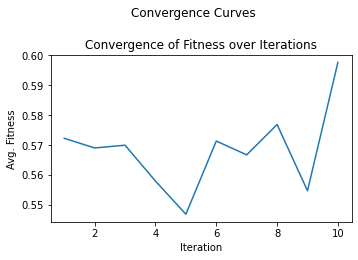

In [46]:
from Py_FS.wrapper.nature_inspired.MA import MA as FS
solution = FS(num_agents=30, max_iter=10, train_data=X, train_label=y1, save_conv_graph=True)

In [47]:
solution.best_agent

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.])

In [48]:
solution.best_accuracy

0.6527777777777778

In [49]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y1, stratify=y1, test_size=0.2, random_state=2)

In [50]:
AB = train_X.to_numpy()
CD =test_X.to_numpy()

In [51]:
!pip install tabulate

In [52]:
from tabulate import tabulate
from Py_FS.evaluation.evaluate import evaluate

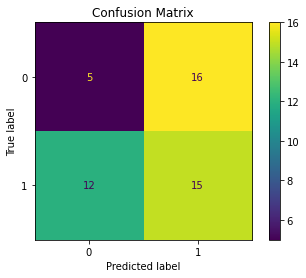

In [53]:
if(len(np.unique(test_Y))) == 2:
  # if it is binary classification, you will get a precision, recall and f1_score for each of the labels
  result = evaluate(AB, CD, y_train, y_test, agent=solution.best_agent, classifier='knn', save_conf_mat=True)
else:  
  # for a multi-class problem, you will get a avreaged precision, recall and f1_score
  # Options for averaging:
  # 1. macro
  # 2. weighted
  # 3. samples
  result = evaluate(AB, CD, y_train, y_test,agent=solution.best_agent, classifier='knn', save_conf_mat=True, averaging="weighted")

In [54]:
result.predictions

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [55]:
result.accuracy

0.4166666666666667